# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [2]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())


 0.0000e+00 -4.6566e-10 -8.5441e-33
-8.5920e+09  2.8026e-45  0.0000e+00
[torch.FloatTensor of size 2x3]

-1432005120.0


### are Numpy arrays inside

In [3]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


 0.0000e+00  0.0000e+00 -8.5441e-33
-8.5920e+09  2.8026e-45  0.0000e+00
[torch.FloatTensor of size 2x3]



## Variables

In [4]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [5]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [6]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [7]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [8]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


In [9]:
torch.sigmoid(Variable(torch.Tensor([6,4,5])))

Variable containing:
 0.9975
 0.9820
 0.9933
[torch.FloatTensor of size 3]

On minimize $L(y - h(x))$ pas à pas:

In [16]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alphas = [0.01, 0.1, 1, 10, 100]
result = []
for alpha in alphas:
    for i in range(100):
        h = torch.sigmoid(w * x + b)
        error = (y - h)**2
        error.backward()

        w.data.sub_(alpha * w.grad.data)
        w.grad.data.zero_()  # must reset to 0 before next pass

        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass

        #print('Epoch {} h={:.05f} w={:.05f} b={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0]))
        event = {"alpha":alpha, "h":h.data[0],"w": w.data[0],"b": b.data[0] }
    result.append(event)

    

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

In [17]:
result

[{'alpha': 0.01,
  'b': -2.1157619953155518,
  'h': 0.8936006426811218,
  'w': 2.8263566493988037},
 {'alpha': 0.1,
  'b': -3.117934465408325,
  'h': 0.2445417046546936,
  'w': 1.323098063468933},
 {'alpha': 1,
  'b': -3.195782423019409,
  'h': 0.2000001072883606,
  'w': 1.206325888633728},
 {'alpha': 10,
  'b': -3.195782423019409,
  'h': 0.20000000298023224,
  'w': 1.2063254117965698},
 {'alpha': 100,
  'b': -3.195782423019409,
  'h': 0.20000000298023224,
  'w': 1.2063254117965698}]

# A vous de jouer !

Voici un jeu de données synthetique.

In [18]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

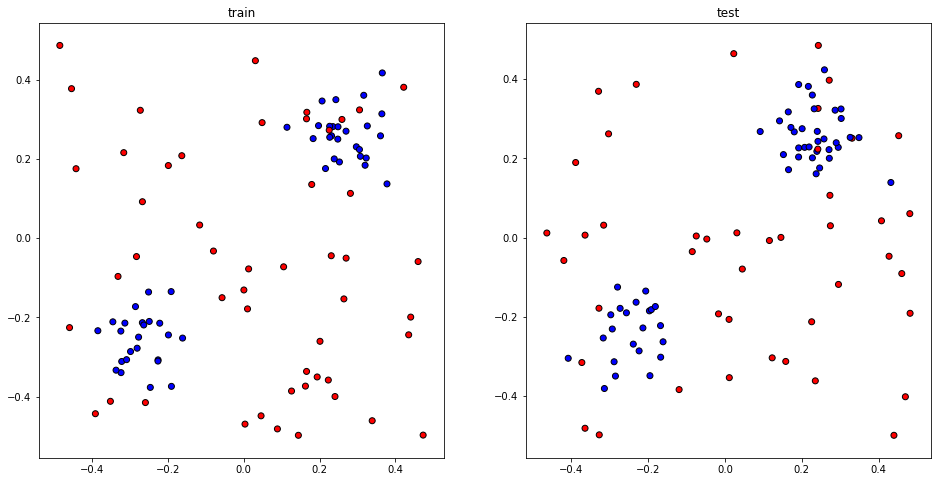

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [21]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(10)

n_in = 2
params = []

n_train = 100

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    global W, b
    
    H = torch.sigmoid(torch.add(torch.matmul(X, W), b))
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 10
train_batch_size = 10
alpha = 0.0001

for i in range(n_epochs):
    train_loss = 0.
    
    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))
        
        loss.backward()

        # Backward pass
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
        

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    #print('Epoch {:03d}\ttrain loss={}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        #i + 1, train_loss, test_loss, test_err))

Visualisez la distribution apprise par votre modèle:

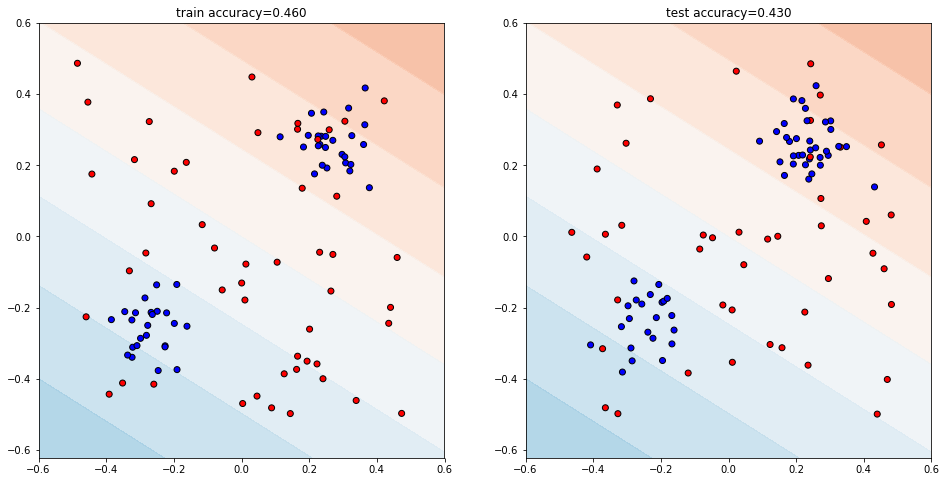

In [22]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

In [23]:
class MyReLU(torch.autograd.Function):
   """
   We can implement our own custom autograd Functions by subclassing
   torch.autograd.Function and implementing the forward and backward passes
   which operate on Tensors.
   """

   def forward(self, inpute):
       """
       In the forward pass we receive a Tensor containing the input and return a
       Tensor containing the output. You can cache arbitrary Tensors for use in the
       backward pass using the save_for_backward method.
       """
       self.save_for_backward(inpute)
       return inpute.clamp(min=0)

   def backward(self, grad_output):
       """
       In the backward pass we receive a Tensor containing the gradient of the loss
       with respect to the output, and we need to compute the gradient of the loss
       with respect to the input.
       """
       inpute, = self.saved_tensors
       grad_input = grad_output.clone()
       grad_input[inpute < 0] = 0
       return grad_input


In [31]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(10)

n_in = 2
params = []

n_train = 100
n_intermediaire = 4
n_out = 1

W1 = Variable(torch.normal(torch.zeros(n_in, n_intermediaire), np.sqrt(2/(n_in + n_out))), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_intermediaire, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)

b1 = Variable(torch.zeros(n_intermediaire), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    global W1, W2, b1, b2
    
    relu = MyReLU()
    H1 = relu(torch.add(torch.matmul(X, W1), b1))
    #H1 = torch.sigmoid(torch.add(torch.matmul(X, W1), b1))
    H2 = torch.sigmoid(torch.add(torch.matmul(H1, W2), b2))
    #H2 = torch.sigmoid(torch.add(torch.matmul(H1, W2), b2))
    return H2


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 10
train_batch_size = 10
alpha = 0.01

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))
        
        loss.backward()
        
        W1.data.sub_(alpha * W1.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
    
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass
               
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
    
        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass
        

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()



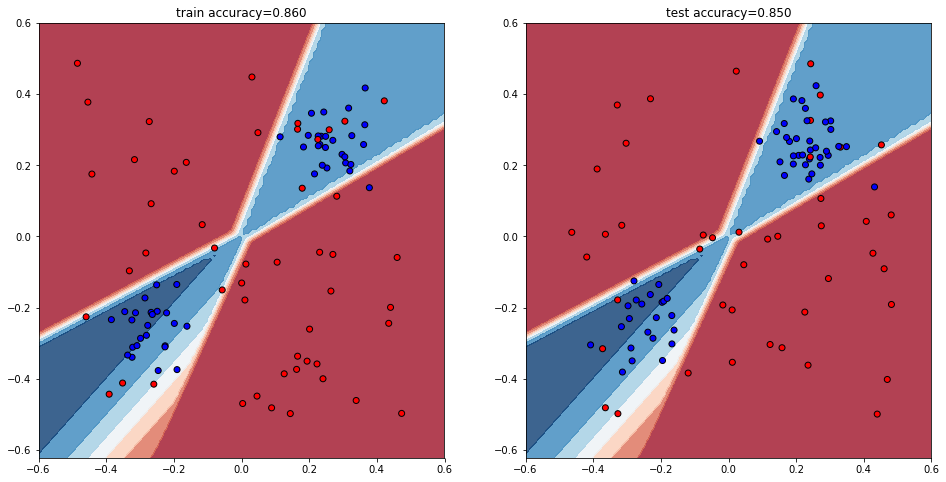

In [32]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

In [33]:
import torchvision

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = '/Users/ppx/Downloads/TP/data'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [35]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le train set:", len(test_data))


Nombre d'images dans le train set: 60000
Nombre d'images dans le train set: 10000


### Afficher quelques images

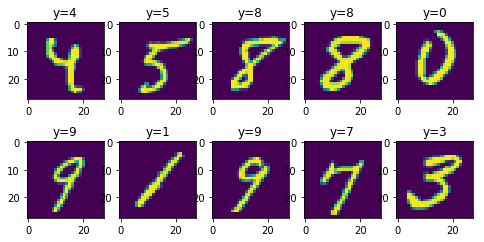

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 123 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

/Users/ppx/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


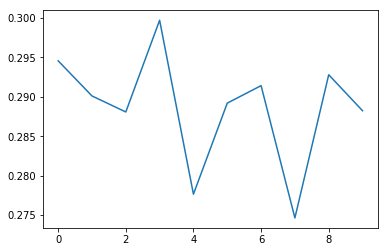

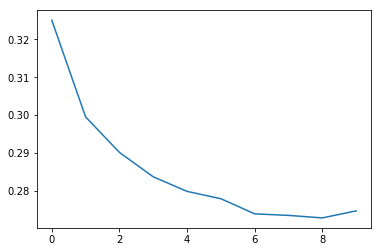

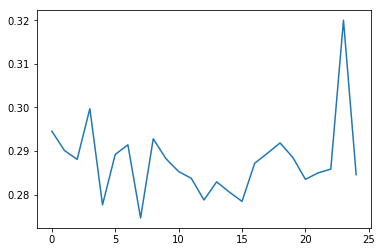

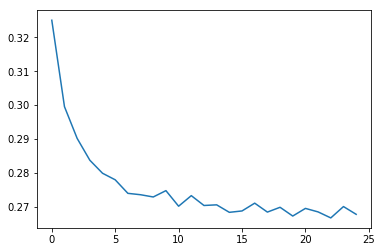

Exception ignored in: <bound method Image.__del__ of <PIL.Image.Image image mode=L size=28x28 at 0x11F58F940>>
Traceback (most recent call last):
  File "/Users/ppx/anaconda3/lib/python3.6/site-packages/PIL/Image.py", line 575, in __del__
    self.fp = None
KeyboardInterrupt


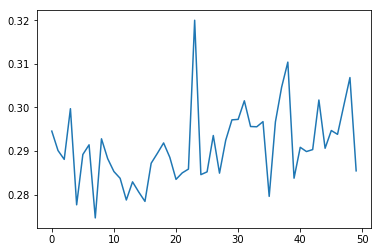

KeyboardInterrupt: 

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import itertools


# Training settings
seed = 1337
#lr = 0.1
lrs = [0.1, 0.01, 0.001]
#epochs = 25
epochss = [10, 25, 50]
#train_batch_size = 50
train_batch_sizes = [10,50]
test_batch_size = 100


result = []
for lr, epochs, train_batch_size in itertools.product(lrs, epochss, train_batch_sizes):
    torch.manual_seed(seed)

    train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(28*28, 10)

        def forward(self, X):
            X = X.view(-1, 28*28)  # flatten images
            X = self.fc1(X)
            return F.log_softmax(X)

    model = Net()

    optimizer = optim.SGD(model.parameters(), lr=lr)

    def train(epoch):

        exp_loss = 0.
        n_processed = 0

        model.train()
        for X, Y in train_loader:
            X, Y = Variable(X), Variable(Y)

            # Forward pass
            Y_pred_prob = model(X)

            # Compute expected loss
            #loss = F.nll_loss(Y_pred_prob, Y)
            #L1Loss, MSELoss, 
            #CrossEntropyLoss, PoissonNLLLoss, 
            #KLDivLoss, BCELoss,
            #BCEWithLogitsLoss, TripletMarginLoss
            loss = F.nll_loss(Y_pred_prob, Y)

            # Backward pass
            loss.backward()

            # Parameter update (gradient descent)
            optimizer.step()
            optimizer.zero_grad()

            # exp_loss.data[0] += loss * X.data.shape[0]
            exp_loss += loss * X.data.shape[0]
            n_processed += X.data.shape[0]

        exp_loss /= n_processed
        return exp_loss

    def test():
        test_loss = 0
        test_error = 0

        model.eval()
        for X, Y in test_loader:
            X, Y = Variable(X, volatile=True), Variable(Y)

            # Forward pass
            Y_pred_prob = model(X)

            # Compute the expected negative log-likelihood
            test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]

            # Get the mode of p(y|x) (most probable digit)
            Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]

            # Compute the expected 0/1 error
            test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

        test_loss /= len(test_loader.dataset)
        test_error /= len(test_loader.dataset)

        return test_loss, test_error

    error = []
    for epoch in range(1, epochs + 1):



        train_loss = train(epoch)
        #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))

        test_loss, test_error = test()
        error.append(test_loss)
        #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    result.append([lr, epochs, train_batch_size, test_loss])

    plt.plot(error)
    plt.show()
    plt.close()

Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

In [74]:
torch.manual_seed(seed)

lr = 0.1
epochs = 2
train_batch_size = 2

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

n_d = 2
ks = 5

    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5)
        self.conv1pool= nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv2pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1pool(self.conv1(X)))
        X = F.relu(self.conv2pool(self.conv2(X)))
        X = X.view(-1, 5*5*16)
        X = self.fc1(X)
        X = X.view(-1, 240)
        X = F.relu(self.fc1(X))
        X = F.sigmoid(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
    
    
model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)

        # Forward pass
        Y_pred_prob = model(X)

        loss = F.nll_loss(Y_pred_prob, Y)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]

    exp_loss /= n_processed
    return exp_loss



def test():
    test_loss = 0
    test_error = 0

    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)

        Y_pred_prob = model(X)

        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]

        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]

        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error

error = []
for epoch in range(1, epochs + 1):

    train_loss = train(epoch)
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))

    test_loss, test_error = test()

RuntimeError: size mismatch, m1: [1 x 240], m2: [400 x 120] at /Users/soumith/minicondabuild3/conda-bld/pytorch_1512381214802/work/torch/lib/TH/generic/THTensorMath.c:1416

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


/Users/ppx/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


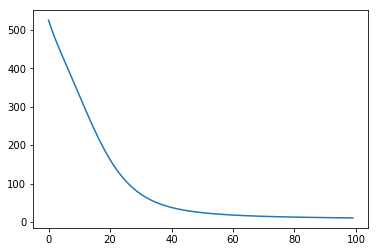

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import itertools


CONTEXT_SIZE = 2
EMBEDDING_DIM = 4
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
plt.plot(losses)  # The loss decreased every iteration over the training data!

In [27]:
loss.data


1.00000e-02 *
  6.6976
[torch.FloatTensor of size 1]

### Utilisez vos propres valeurs pour context

In [16]:
# context = # TODO
context = ['own', 'deep']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['own', 'deep'] sunken


/Users/ppx/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [30]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 4  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
LEARNING_RATE = 0.001
EPOCHS = 100
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

class CBOW(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 64)
        self.linear2 = nn.Linear(64, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.nll_loss(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs
    
    
loss_function = nn.NLLLoss()
model = CBOW(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
plt.plot(losses)  # The loss decreased every iteration over the training data!



[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


KeyError: 'When'